---
# Introduction to Machine Learning - Lab 3
---

Following are the steps to import a dataset (bill_authentication.csv) and preparing the decision tree.

---
### Importing Libraries and Dataset, Splitting into Training/Test Data
---

In [48]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier


SEED = 42

data = load_wine()
x=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

---
### Preparing the Decision Tree
---

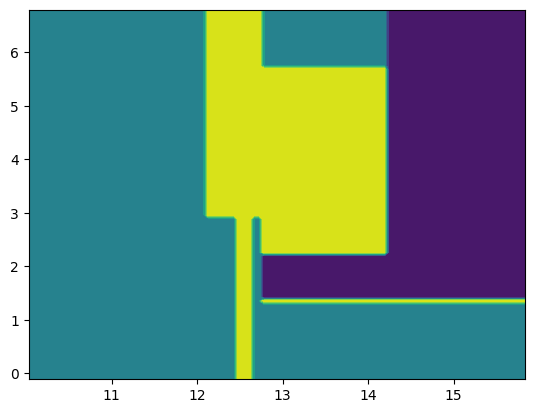

In [50]:
X_train_cols=X_train[:,:2]
classifier = DecisionTreeClassifier(max_depth=4, random_state=SEED).fit(X_train_cols, y_train)
disp=DecisionBoundaryDisplay.from_estimator(classifier, X_train_cols, response_method="predict")